###### T81-577: Applied Data Science for Practioners

 - Instructor: Asim Banskota, School of Engineering and Applied Science, Washington University in St. Louis

# The Final Project

### Name: Kunihiro Fujita
#### References
- https://www.kaggle.com/dejavu23/sms-spam-or-ham-beginner
- https://www.kaggle.com/muzzzdy/sms-spam-detection-with-various-classifiers
- https://www.kaggle.com/jcbrooks/airlines-delay-and-cancellation-analysis

## As for automation by pipeline
#### In this project, the both of predictors and target variables doesn't have any missing value. Besides, predictors can be converted to sparse matrix called 'features' as shown below. So, the Principle Component Analysis (PCA) method cannot be used, too. Therefore, I couldn't use pipeline in this case. Instead, I used the function I coded as 'hptuning' in the case of hyperparameter tuning. This function plays a role of automation in the hyperparameter tuning by random grid search.

# Table of Contents

1. [Import necessary libraries and packages](#import)
2. [Pre-processing: Exploratory Data Analysis (EDA)](#EDA)
3. [Visualization of SMS messages](#VisSMS)<br>
    - [Fig.1 Histogram of ham and spam](#fig1)<br>
    - [Fig.2 Pie graph](#fig2)<br>
    - [Fig.3 Histogram of txt length](#fig3)<br>
    - [Fig.4 Histogram of txt length-2 (The merge of two plots of Fig. 3)](#fig4)<br>
4. [Visualization by WordCloud](#VisWC)<br>
    - [Fig.5 WordCloud for Ham messages](#fig5)<br>
    - [Fig.6 WordCloud for Spam messages](#fig6)<br>
5. [Data Cleaning for word analysis](#Dclean)<br>
    - Lower Case <br>
    - Punctuation Removal <br>
    - Number of stopwords <br>
    - Removal of stopwords <br>
    - [Fig.7 The visualization of top 30 frequent word in ham message](#fig7)<br>
    - [Fig.8 The visualization of top 30 frequent word in spam message](#fig8)<br>
6. [Text vectorization](#Tvec)
7. [Classifiers and Predictions](#Clfp)<br>
    - [7.1 Support Vector Classifier](#SVC)<br>
    - [7.2 K-Nearest Neighbor](#knc)<br>
    - [7.3 Multinomial NB](#mnb)<br>
    - [7.4 Decision Tree Classifier](#dtc)<br>
    - [7.5 Logistic Regression](#lrc)<br>
    - [7.6 Random Forest Classifier](#rf)<br>
    - [7.7 AdaBoost Classifier](#abc)<br>
    - [7.8 Bagging Classifier](#bc)<br>
    - [7.9 Extra Trees Classifier](#etc)<br>
    - [7.10 Gradient boosting tree](#gb)<br>
    - [7.11 Newral network approach](#mlp)<br>
    - [Case Study 1](#cs1)<br>
    - [Case Study 2 -Stemming-](#cs2)<br>
    - [Case Study 3 -Message Length-](#cs3)<br>
8. [Results of Case Studies](#Rslts)<br>
    - [Fig.9 Result of the Case Study 1](#fig9)<br>
    - [Fig.10 Results of the Case Studyies 1 and 2](#fig10)<br>
    - [Fig.11 Results of the Case Studyies 1, 2 and 3](#fig11)

In [1]:
#%load_ext pycodestyle_magic

# 1. Import necessary libraries and packages
<a id="import"></a>

In [2]:
#%%pycodestyle
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
%matplotlib inline

In [3]:
#%%pycodestyle
import string
import string
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [61]:
#%%pycodestyle
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV

In [5]:
#%%pycodestyle
import wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [6]:
#%%pycodestyle
import os
import sys
src_dir = os.path.join(os.getcwd(), '..', 'src')
sys.path.append(src_dir)

# 2. Pre-processing: Exploratory Data Analysis (EDA)
<a id="EDA"></a>

In [7]:
#%%pycodestyle
# import raw data from 'raw' folder
sms_proc = pd.read_csv('../data/raw/spam.csv', encoding='latin-1')
# take a look at the dataset
sms_proc.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [8]:
#%%pycodestyle
# Drop ''unnamed' columns and Rename v1 and v2
sms_proc = sms_proc.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
sms_proc = sms_proc.rename(columns={'v1':'label', 'v2':'message'})

In [9]:
#%%pycodestyle
sms_proc.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
#%%pycodestyle
# check if NA exists in each column
sms_proc.isnull().any()

label      False
message    False
dtype: bool

#### We can confirm that there are no NaN value in 'label' and 'message'.

In [11]:
#%%pycodestyle
# Copy the preporecessed data
sms = sms_proc.copy()

# 3. Visualization of SMS messages
<a id="VisSMS"></a>

### Fig.1 Histogram of ham and spam
<a id="fig1"></a>

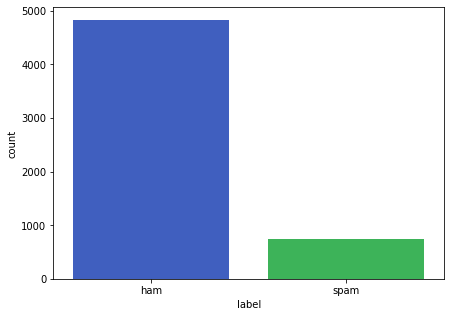

In [13]:
#%%pycodestyle
fig1 = sms
plt.style.use('seaborn-bright')
plt.rcParams["figure.figsize"] = (7, 5)
sns.countplot(x="label", data=fig1, saturation=0.5)

### Fig.2 Pie graph
<a id="fig2"></a>

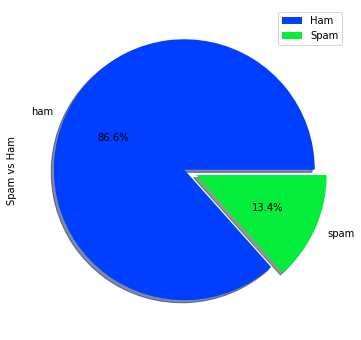

In [15]:
#%%pycodestyle
sms["label"].value_counts().plot(kind='pie', explode=[0, 0.1], figsize=(6, 6),
                                 autopct='%1.1f%%', shadow=True)
plt.style.use('seaborn-bright')
plt.ylabel("Spam vs Ham")
plt.legend(["Ham", "Spam"])
plt.show()

In [16]:
#%%pycodestyle
# new feature 'message length'
sms['length'] = sms['message'].apply(len)
sms.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


### Fig.3 Histogram of txt length
<a id="fig3"></a>

array([<matplotlib.axes._subplots.AxesSubplot object at 0x120f21bd0>,
      dtype=object)

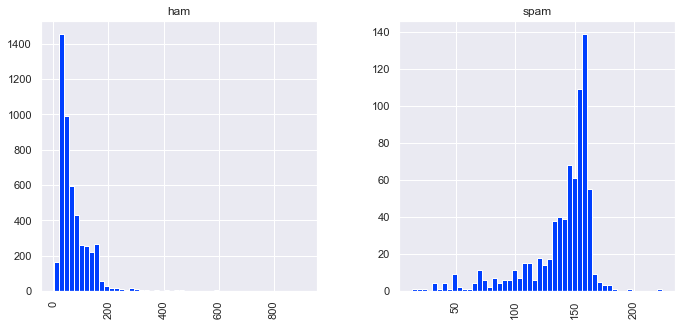

In [17]:
#%%pycodestyle
sns.set()
mpl.rcParams['patch.force_edgecolor'] = True
plt.style.use('seaborn-bright')
sms.hist(column='length', by='label', bins=50, figsize=(11, 5))

The above plot infers that spam message tends to be a lenghthy.
The below plot shows the above two plots in one fifgure by label.

### Fig.4 Histogram of txt length-2 (The merge of two plots of Fig. 3)
<a id="fig4"></a>

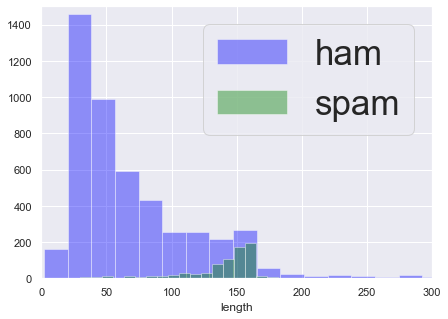

In [18]:
#%%pycodestyle
ax = sns.distplot(
    sms.query('label=="ham"')['length'],
    bins=50,
    color='blue',
    kde=False,
    label='ham'
)
ax = sns.distplot(
    sms.query('label=="spam"')['length'],
    bins=25,
    color='green',
    kde=False,
    label='spam'
)

plt.rcParams["figure.figsize"] = (18, 15)
ax.set(xlim=(0, 300), ylim=(0, 1500))
plt.legend(fontsize='35')
plt.show()

# 4. Visualization by WordCloud
#### WordCloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. https://www.geeksforgeeks.org/generating-word-cloud-python/
<a id="VisWC"></a>

In [19]:
#%%pycodestyle
sms_ham = sms[sms['label'] == 'ham'].copy()
sms_spam = sms[sms['label'] == 'spam'].copy()

In [21]:
#%%pycodestyle
def show_wordcloud(sms_spam_or_ham, title):
    """VIsualize by WordCloud."""
    text = ' '.join(sms_spam_or_ham['message'].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,
                                        background_color='lightgrey',
                                        colormap='viridis', width=800,
                                        height=600).generate(text)

    plt.figure(figsize=(10, 7), frameon=True)
    plt.imshow(fig_wordcloud)
    plt.axis('off')
    plt.title(title, fontsize=20)
    plt.show()

### Fig.5 WordCloud for Ham messages
<a id="fig5"></a>

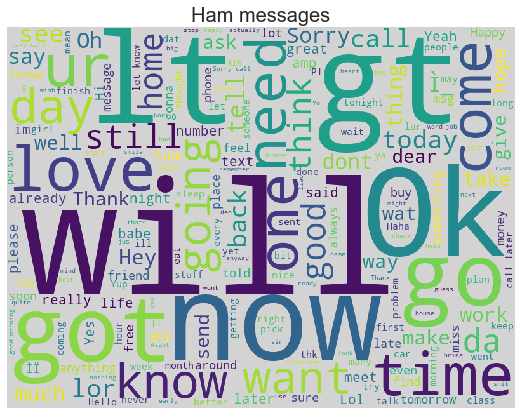

In [22]:
#%%pycodestyle
show_wordcloud(sms_ham, "Ham messages")

### Fig.6 WordCloud for Spam messages
<a id="fig6"></a>

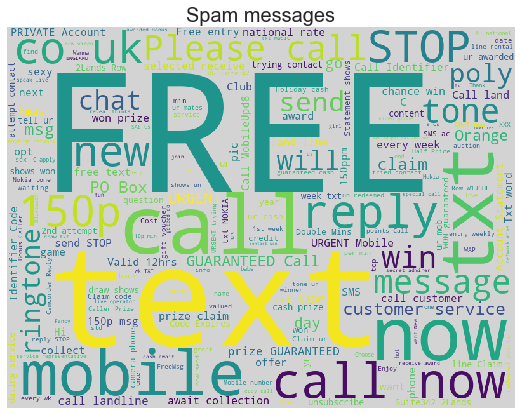

In [23]:
#%%pycodestyle
show_wordcloud(sms_spam, "Spam messages")

# 5. Data Cleaning for word analysis
<a id="Dclean"></a>

In [24]:
#%%pycodestyle
word = sms.copy()

### Lower Case
#### Converting all texts to lower case

In [25]:
#%%pycodestyle
# lower case
word['message'] = word['message'].apply(lambda x: " ".join
                                        (x.lower() for x in x.split()))
word['message'].head()

0    go until jurong point, crazy.. available only ...
1                        ok lar... joking wif u oni...
2    free entry in 2 a wkly comp to win fa cup fina...
3    u dun say so early hor... u c already then say...
4    nah i don't think he goes to usf, he lives aro...
Name: message, dtype: object

### Punctuation Removal

In [26]:
#%%pycodestyle
# Remove punctuation
word['message'] = word['message'].str.replace(r'[^\w\s]', '')
word['message'].head()

0    go until jurong point crazy available only in ...
1                              ok lar joking wif u oni
2    free entry in 2 a wkly comp to win fa cup fina...
3          u dun say so early hor u c already then say
4    nah i dont think he goes to usf he lives aroun...
Name: message, dtype: object

### Number of stopwords
Stopwords are the English words such as 'and', 'the', 'you', which does not add much meaning to a sentence. Stopwords are sometimes/often removed to avoid them being analyzed in the case of text analysis.  

In [27]:
#%%pycodestyle
# from nltk.corpus import stopwords
stop = stopwords.words('english')
word['stopwords'] = word['message'].apply(lambda x: len([x for x in x.split()
                                                         if x in stop]))
word[['message', 'stopwords']].head()

,message,stopwords
0,go until jurong point crazy available only in ...,4
1,ok lar joking wif u oni,0
2,free entry in 2 a wkly comp to win fa cup fina...,5
3,u dun say so early hor u c already then say,2
4,nah i dont think he goes to usf he lives aroun...,5


In [28]:
#%%pycodestyle
word = word.drop('stopwords', axis=1)

### Removal of stopwords

In [29]:
#%%pycodestyle
# Remove stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')
word['message'] = word['message'].apply(lambda x: " ".join(x for x in x.split()
                                                           if x not in stop))
word['message'].head()

0    go jurong point crazy available bugis n great ...
1                              ok lar joking wif u oni
2    free entry 2 wkly comp win fa cup final tkts 2...
3                  u dun say early hor u c already say
4          nah dont think goes usf lives around though
Name: message, dtype: object

#### Top 30 Frequent word

In [30]:
#%%pycodestyle
# Top 30 Frequent word
freq = pd.Series(' '.join(word['message']).split()).value_counts()[:30]
freq

u        1119
call      576
2         478
im        462
get       386
ur        384
4         287
dont      279
go        278
ok        277
ltgt      276
free      275
know      257
like      242
got       238
ill       237
good      234
come      226
time      208
day       202
love      195
want      192
send      190
text      188
going     171
one       170
need      166
txt       163
home      162
lor       160
dtype: int64

In [31]:
#%%pycodestyle
word_ham = word.loc[word['label'] == 'ham']
word_spam = word.loc[word['label'] == 'spam']

#### Top 30 Frequent word in ham message

In [32]:
#%%pycodestyle
# Top 30 Frequent word in ham message
freq_ham = pd.Series(' '.join(word_ham['message']).split()).value_counts()[:30]
freq_ham

u        972
im       449
2        305
get      303
ltgt     276
ok       272
dont     257
go       247
ur       240
ill      236
know     232
got      231
like     229
call     229
come     224
good     222
time     189
day      187
love     185
4        168
going    167
want     163
one      162
home     160
lor      160
need     156
sorry    153
still    146
see      137
n        134
dtype: int64

In [33]:
#%%pycodestyle
freq_ham = pd.DataFrame(freq_ham)
column = ["total"]
freq_ham.columns = column
freq_ham.head()

,total
u,972
im,449
2,305
get,303
ltgt,276


In [34]:
#%%pycodestyle
x = freq_ham.index

### Fig.7 The visualization of top 30 frequent word in ham message
<a id="fig7"></a>

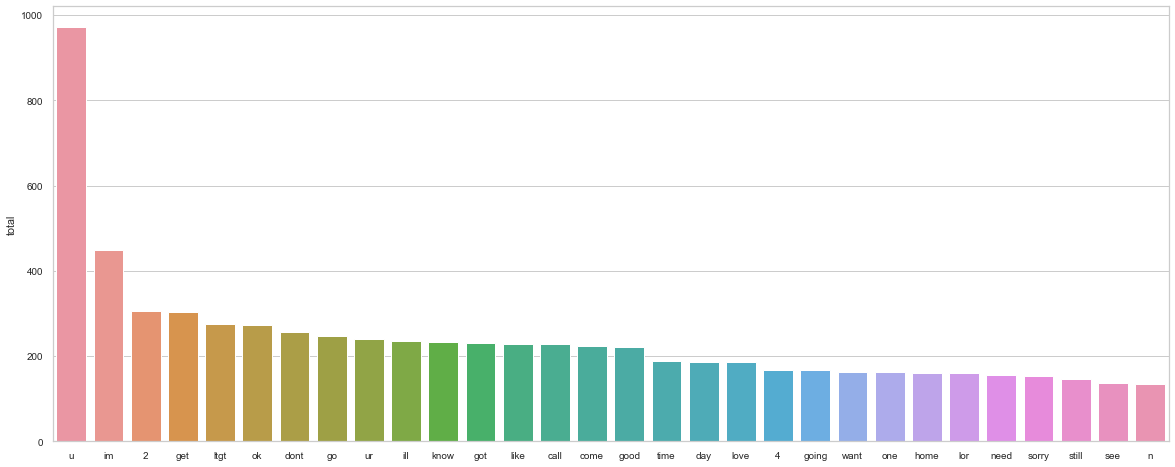

In [35]:
#%%pycodestyle
plt.figure(figsize=(20, 8))
sns.set_context("notebook", 0.9, {"lines.linewidth": 4})
sns.set_style(style='whitegrid')
ax = sns.barplot(x, data=freq_ham, y="total")
ax.set(ylabel='total')
# plt.xticks(rotation=90)
plt.show()

#### Top 30 Frequent word in spam message

In [36]:
#%%pycodestyle
# Top 30 Frequent word in spam message
freq_spam = pd.Series(' '.join
                      (word_spam['message']).split()).value_counts()[:30]
freq_spam

call          347
free          216
2             173
txt           150
u             147
ur            144
mobile        123
text          120
4             119
stop          113
claim         113
reply         101
prize          92
get            83
new            69
send           67
nokia          65
urgent         63
cash           62
win            60
contact        56
service        55
please         52
guaranteed     50
customer       49
week           49
16             49
tone           48
per            46
phone          45
dtype: int64

In [37]:
#%%pycodestyle
freq_spam = pd.DataFrame(freq_spam)
column = ["total"]
freq_spam.columns = column
freq_spam.head()

,total
call,347
free,216
2,173
txt,150
u,147


In [38]:
#%%pycodestyle
x = freq_spam.index

### Fig.8 The visualization of top 30 frequent word in spam message
<a id="fig8"></a>

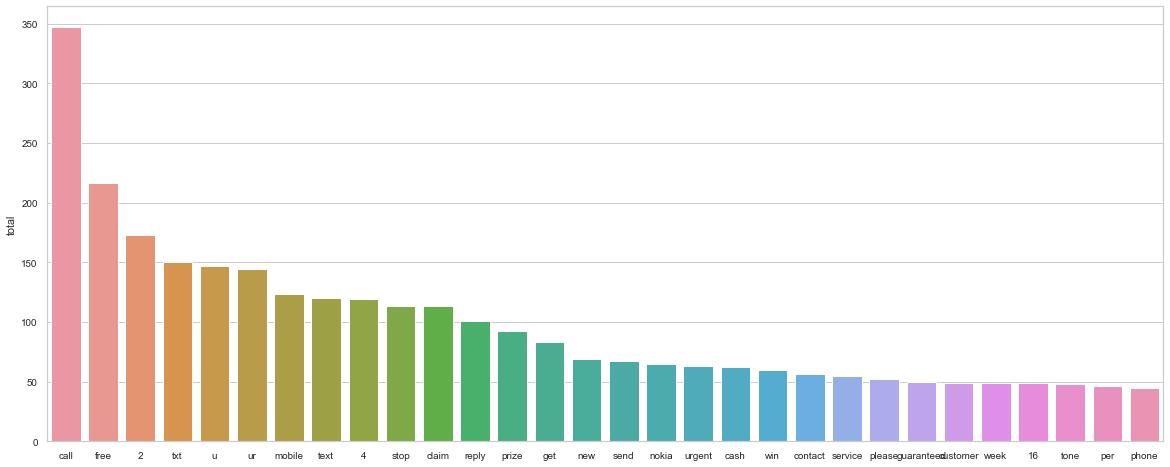

In [39]:
#%%pycodestyle
plt.figure(figsize=(20, 8))
sns.set_context("notebook", 0.9, {"lines.linewidth": 4})
ax = sns.barplot(x, data=freq_spam, y="total")
ax.set(ylabel='total')
# plt.xticks(rotation=90)
plt.show()

# 6. Text vectorization
<a id="Tvec"></a>

In [62]:
#%%pycodestyle
text_msg = sms['message'].copy()

In [63]:
#%%pycodestyle
def text_process(text):
    """Remove punctuation and stopwords"""
    text = text.translate(str.maketrans(' ', ' ', string.punctuation))
    text = [word for word in text.split() if word.lower() not in
            stopwords.words('english')]
    return " ".join(text)

In [64]:
#%%pycodestyle
text_msg = text_msg.apply(text_process)

In [65]:
#%%pycodestyle
vectorizer = TfidfVectorizer("english")

In [66]:
#%%pycodestyle
features = vectorizer.fit_transform(text_msg)

# 7. Classifiers and Predictions
<a id="Clfp"></a>

In [67]:
#%%pycodestyle
# Split our features to test and train set
features_train, features_test, labels_train, labels_test = train_test_split(
    features, sms['label'], test_size=0.3, random_state=111)

#### Automation by the hyperparameter

In [68]:
#%%pycodestyle
def hptuning(clf, param_grid):
    """Hyperparameter Tuning."""
    random_grid_search = RandomizedSearchCV(
        estimator=clf, param_distributions=param_grid)
    random_grid_search.fit(features_train, labels_train)
    best_grid_randomsearch = random_grid_search.best_estimator_
    print('Best hyperparameters ... \n', best_grid_randomsearch)

In [83]:
#from features import hyperparameter_tuning
#from features.hyperparameter_tuning import hptuning

### 7.1 Support Vector Classifier
<a id="SVC"></a>

In [70]:
#%%pycodestyle
svc = SVC()
print(svc)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)


#### Hyperparameter tuning by random search

In [71]:
#%%pycodestyle
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': [1.0, 3.0, 5.0, 10.0, 20.0]
}

#### SVC model run 

In [49]:
#%%pycodestyle
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
svc = SVC(kernel='linear', gamma=5.0, random_state=111).fit(
    features_train, labels_train)
labels_pred = svc.predict(features_test)
print('Recall: {:.3f}'.format(recall_score(labels_test, labels_pred,
                                           average='macro')))
print('Precision: {:.3f}'.format(precision_score(labels_test, labels_pred,
                                                 average='macro')))
print('Accuracy: {:.3f}'.format(accuracy_score(labels_test, labels_pred)))
print('F1: {:.3f}'.format(f1_score(labels_test, labels_pred, average='macro')))
confusion = confusion_matrix(labels_test, labels_pred)
print(confusion)

Recall: 0.930
Precision: 0.984
Accuracy: 0.980
F1: 0.955
[[1438    2]
 [  32  200]]


### 7.2 K-Nearest Neighbor
<a id="knc"></a>

In [50]:
#%%pycodestyle
knc = KNeighborsClassifier()
print(knc)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


#### Hyperparameter tuning by random search

In [60]:
#%%pycodestyle
param_grid = {
    'n_neighbors': [1, 10, 25, 50, 75, 100]
}

In [62]:
#%%pycodestyle
# Hyperparameter tuning
rgs = hptuning(knc, param_grid)

//miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
//miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:266: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Best hyperparameters ... 
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')


#### K-Nearest Neighbor model run 

In [51]:
#%%pycodestyle
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
knc = KNeighborsClassifier(n_neighbors=1).fit(features_train, labels_train)
labels_pred = knc.predict(features_test)

print('Recall: {:.3f}'.format(recall_score(labels_test, labels_pred,
                                           average='macro')))
print('Precision: {:.3f}'.format(precision_score(labels_test, labels_pred,
                                                 average='macro')))
print('Accuracy: {:.3f}'.format(accuracy_score(labels_test, labels_pred)))
print('F1: {:.3f}'.format(f1_score(labels_test, labels_pred, average='macro')))
confusion = confusion_matrix(labels_test, labels_pred)
print(confusion)

Recall: 0.797
Precision: 0.969
Accuracy: 0.944
F1: 0.857
[[1440    0]
 [  94  138]]


### 7.3 Multinomial NB
<a id="mnb"></a>

In [52]:
#%%pycodestyle
mnb = MultinomialNB()
print(mnb)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


#### Hyperparameter tuning by random search

In [71]:
#%%pycodestyle
param_grid = {
    'alpha': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0]
}

In [74]:
#%%pycodestyle
# Hyperparameter tuning
rgs = hptuning(mnb, param_grid)

//miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
//miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:266: UserWarning: The total space of parameters 7 is smaller than n_iter=10. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Best hyperparameters ... 
 MultinomialNB(alpha=0.2, class_prior=None, fit_prior=True)


#### Multinomial NB model run

In [53]:
#%%pycodestyle
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
mnb = MultinomialNB(alpha=0.2).fit(features_train, labels_train)
labels_pred = mnb.predict(features_test)

print('Recall: {:.3f}'.format(recall_score(labels_test, labels_pred,
                                           average='macro')))
print('Precision: {:.3f}'.format(precision_score(labels_test, labels_pred,
                                                 average='macro')))
print('Accuracy: {:.3f}'.format(accuracy_score(labels_test, labels_pred)))
print('F1: {:.3f}'.format(f1_score(labels_test, labels_pred, average='macro')))
confusion = confusion_matrix(labels_test, labels_pred)
print(confusion)

Recall: 0.966
Precision: 0.969
Accuracy: 0.984
F1: 0.967
[[1428   12]
 [  14  218]]


### 7.4 Decision Tree Classifier
<a id="dtc"></a>

In [54]:
#%%pycodestyle
dtc = DecisionTreeClassifier()
print(dtc)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


#### Hyperparameter tuning by random search

In [81]:
#%%pycodestyle
param_grid = {
    'min_samples_split': [2, 5, 7, 10, 30]
}

In [87]:
#%%pycodestyle
# Hyperparameter tuning
rgs = hptuning(dtc, param_grid)

//miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
//miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:266: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Best hyperparameters ... 
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=111, splitter='best')


#### Decision Tree model run 

In [55]:
#%%pycodestyle
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=111).fit(
    features_train, labels_train)
labels_pred = dtc.predict(features_test)

print('Recall: {:.3f}'.format(recall_score(labels_test, labels_pred,
                                           average='macro')))
print('Precision: {:.3f}'.format(precision_score(labels_test, labels_pred,
                                                 average='macro')))
print('Accuracy: {:.3f}'.format(accuracy_score(labels_test, labels_pred)))
print('F1: {:.3f}'.format(f1_score(labels_test, labels_pred, average='macro')))
confusion = confusion_matrix(labels_test, labels_pred)
print(confusion)

Recall: 0.907
Precision: 0.918
Accuracy: 0.959
F1: 0.913
[[1409   31]
 [  38  194]]


### 7.5 Logistic Regression
<a id="lrc"></a>

In [56]:
#%%pycodestyle
lrc = LogisticRegression()
print(lrc)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


#### Hyperparameter tuning by random search

In [92]:
#%%pycodestyle
param_grid = {
    'solver': ['liblinear', 'saga'],
    'penalty': ['l1', 'l2']
}

In [94]:
#%%pycodestyle
# Hyperparameter tuning
rgs = hptuning(lrc, param_grid)

//miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
//miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:266: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
//miniconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Best hyperparameters ... 
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


#### Logistic Regression model run 

In [57]:
#%%pycodestyle
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
lrc = LogisticRegression(solver='liblinear', penalty='l1').fit(
    features_train, labels_train)
labels_pred = lrc.predict(features_test)

print('Recall: {:.3f}'.format(recall_score(labels_test, labels_pred,
                                           average='macro')))
print('Precision: {:.3f}'.format(precision_score(labels_test, labels_pred,
                                                 average='macro')))
print('Accuracy: {:.3f}'.format(accuracy_score(labels_test, labels_pred)))
print('F1: {:.3f}'.format(f1_score(labels_test, labels_pred, average='macro')))
confusion = confusion_matrix(labels_test, labels_pred)
print(confusion)

Recall: 0.822
Precision: 0.929
Accuracy: 0.943
F1: 0.865
[[1425   15]
 [  80  152]]


### 7.6 Random Forest Classifier
<a id="rf"></a>

In [99]:
#%%pycodestyle
rf = RandomForestClassifier()
print(rf)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


#### Hyperparameter tuning by random search

In [101]:
#%%pycodestyle
param_grid = {
    'n_estimators': [5, 10, 28, 29, 30, 31, 32, 33, 40, 50],
    'random_state': [111]
}

In [103]:
#%%pycodestyle
# Hyperparameter tuning
hptuning(rf, param_grid)

//miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best hyperparameters ... 
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=29,
                       n_jobs=None, oob_score=False, random_state=111,
                       verbose=0, warm_start=False)


#### Random Forest model run

In [58]:
#%%pycodestyle
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
rf = RandomForestClassifier(n_estimators=29, random_state=111).fit(
    features_train, labels_train)
labels_pred = rf.predict(features_test)

print('Recall: {:.3f}'.format(recall_score(labels_test, labels_pred,
                                           average='macro')))
print('Precision: {:.3f}'.format(precision_score(labels_test, labels_pred,
                                                 average='macro')))
print('Accuracy: {:.3f}'.format(accuracy_score(labels_test, labels_pred)))
print('F1: {:.3f}'.format(f1_score(labels_test, labels_pred, average='macro')))
confusion = confusion_matrix(labels_test, labels_pred)
print(confusion)

Recall: 0.890
Precision: 0.983
Accuracy: 0.969
F1: 0.930
[[1440    0]
 [  51  181]]


### 7.7 AdaBoost Classifier
<a id="abc"></a>

In [108]:
#%%pycodestyle
abc = AdaBoostClassifier()
print(abc)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)


#### Hyperparameter tuning by random search

In [110]:
#%%pycodestyle
param_grid = {
    'n_estimators': [10, 50, 60, 61, 62, 63, 65, 70],
    'random_state': [111]
}

In [112]:
#%%pycodestyle
# Hyperparameter tuning
hptuning(abc, param_grid)

//miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
//miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:266: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Best hyperparameters ... 
 AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=70, random_state=111)


#### AdaBoostClassifier model run

In [59]:
#%%pycodestyle
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
abc = AdaBoostClassifier(n_estimators=70, random_state=111).fit(
    features_train, labels_train)
labels_pred = abc.predict(features_test)

print('Recall: {:.3f}'.format(recall_score(labels_test, labels_pred,
                                           average='macro')))
print('Precision: {:.3f}'.format(precision_score(labels_test, labels_pred,
                                                 average='macro')))
print('Accuracy: {:.3f}'.format(accuracy_score(labels_test, labels_pred)))
print('F1: {:.3f}'.format(f1_score(labels_test, labels_pred, average='macro')))
confusion = confusion_matrix(labels_test, labels_pred)
print(confusion)

Recall: 0.911
Precision: 0.966
Accuracy: 0.971
F1: 0.936
[[1432    8]
 [  40  192]]


### 7.8 Bagging Classifier
<a id="bc"></a>

In [118]:
#%%pycodestyle
bc = BaggingClassifier()
print(bc)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)


#### Hyperparameter tuning by random search

In [120]:
#%%pycodestyle
param_grid = {
    'n_estimators': [5, 8, 9, 10, 11, 12, 13, 15, 20],
    'random_state': [111]
}

In [122]:
#%%pycodestyle
# Hyperparameter tuning
hptuning(bc, param_grid)

//miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
//miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:266: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Best hyperparameters ... 
 BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=5,
                  n_jobs=None, oob_score=False, random_state=111, verbose=0,
                  warm_start=False)


#### Bagging Classifier model run

In [60]:
#%%pycodestyle
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
bc = BaggingClassifier(n_estimators=5, random_state=111).fit(
    features_train, labels_train)
labels_pred = bc.predict(features_test)

print('Recall: {:.3f}'.format(recall_score(labels_test, labels_pred,
                                           average='macro')))
print('Precision: {:.3f}'.format(precision_score(labels_test, labels_pred,
                                                 average='macro')))
print('Accuracy: {:.3f}'.format(accuracy_score(labels_test, labels_pred)))
print('F1: {:.3f}'.format(f1_score(labels_test, labels_pred, average='macro')))
confusion = confusion_matrix(labels_test, labels_pred)
print(confusion)

Recall: 0.913
Precision: 0.941
Accuracy: 0.966
F1: 0.926
[[1420   20]
 [  37  195]]


### 7.9 Extra Trees Classifier
<a id="etc"></a>

In [126]:
#%%pycodestyle
etc = ExtraTreesClassifier()
print(etc)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators='warn',
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)


#### Hyperparameter tuning by random search

In [128]:
#%%pycodestyle
param_grid = {
    'n_estimators': [5, 8, 9, 10, 11, 12, 13, 15, 20],
    'random_state': [111]
}

In [130]:
#%%pycodestyle
# Hyperparameter tuning
hptuning(etc, param_grid)

//miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
//miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:266: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Best hyperparameters ... 
 ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=11, n_jobs=None,
                     oob_score=False, random_state=111, verbose=0,
                     warm_start=False)


#### Extra Classifier model run

In [61]:
#%%pycodestyle
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
etc = ExtraTreesClassifier(n_estimators=11, random_state=111).fit(
    features_train, labels_train)
labels_pred = etc.predict(features_test)

print('Recall: {:.3f}'.format(recall_score(labels_test, labels_pred,
                                           average='macro')))
print('Precision: {:.3f}'.format(precision_score(labels_test, labels_pred,
                                                 average='macro')))
print('Accuracy: {:.3f}'.format(accuracy_score(labels_test, labels_pred)))
print('F1: {:.3f}'.format(f1_score(labels_test, labels_pred, average='macro')))
confusion = confusion_matrix(labels_test, labels_pred)
print(confusion)

Recall: 0.924
Precision: 0.983
Accuracy: 0.978
F1: 0.951
[[1438    2]
 [  35  197]]


### 7.10 Gradient boosting tree
<a id="gb"></a>

In [133]:
#%%pycodestyle
gb = GradientBoostingClassifier()
print(gb)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


#### Hyperparameter tuning by random search

In [136]:
#%%pycodestyle
param_grid = {
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
    'max_depth': [1, 3, 5],
    'n_estimators': [10, 100, 200],
    'random_state': [111]
}

In [138]:
#%%pycodestyle
# Hyperparameter tuning
hptuning(gb, param_grid)

//miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best hyperparameters ... 
 GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=111, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


#### Gradient Boosting Tree model run

In [62]:
#%%pycodestyle
gb = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1,
                                max_depth=5).fit(features_train, labels_train)
labels_predicted = gb.predict(features_test)
confusion = confusion_matrix(labels_test, labels_predicted)

print('Recall: {:.3f}'.format(recall_score(labels_test, labels_predicted,
                                           average='macro')))
print('Precision: {:.3f}'.format(precision_score(labels_test, labels_predicted,
                                                 average='macro')))
print('Accuracy: {:.3f}'.format(accuracy_score(labels_test, labels_predicted)))
print('F1: {:.3f}'.format(f1_score(labels_test, labels_predicted,
                                   average='macro')))
confusion = confusion_matrix(labels_test, labels_predicted)
print(confusion)

Recall: 0.912
Precision: 0.960
Accuracy: 0.970
F1: 0.934
[[1429   11]
 [  39  193]]


### 7.11 Newral network approach
<a id="mlp"></a>

In [148]:
#%%pycodestyle
mlp = MLPClassifier()
print(mlp)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)


#### Hyperparameter tuning by random search

In [171]:
#%%pycodestyle
param_grid = {
    'alpha': [0.0001, 0.0003, 0.003],
    'max_iter': [10, 100, 200]
}

In [178]:
#%%pycodestyle
random_grid_search = RandomizedSearchCV(
    estimator=mlp, param_distributions=param_grid,
    cv=3, n_jobs=-1, verbose=2, n_iter=10)
random_grid_search.fit(features_train, labels_train)

//miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:266: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:  3.6min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                           batch_size='auto', beta_1=0.9,
                                           beta_2=0.999, early_stopping=False,
                                           epsilon=1e-08,
                                           hidden_layer_sizes=(100,),
                                           learning_rate='constant',
                                           learning_rate_init=0.001,
                                           max_iter=200, momentum=0.9,
                                           n_iter_no_change=10,
                                           nesterovs_momentum=True, power_t=0.5,
                                           random_state=None, shuffle=True,
                                           solver='adam', tol=0.0001,
                                           validation_fraction=0.1,
                 

In [63]:
#%%pycodestyle
mlp = MLPClassifier(hidden_layer_sizes=[10], alpha=0.0003,
                    max_iter=200, random_state=111).fit(
    features_train, labels_train)
labels_predicted = mlp.predict(features_test)
confusion = confusion_matrix(labels_test, labels_predicted)

print('Recall: {:.3f}'.format(recall_score(labels_test, labels_predicted,
                                           average='macro')))
print('Precision: {:.3f}'.format(precision_score(labels_test, labels_predicted,
                                                 average='macro')))
print('Accuracy: {:.3f}'.format(accuracy_score(labels_test, labels_predicted)))
print('F1: {:.3f}'.format(f1_score(labels_test, labels_predicted,
                                   average='macro')))
confusion = confusion_matrix(labels_test, labels_predicted)
print(confusion)

Recall: 0.943
Precision: 0.982
Accuracy: 0.982
F1: 0.961
[[1436    4]
 [  26  206]]


#### Introduce various classifiers

In [64]:
#%%pycodestyle
svc = SVC(kernel='linear', gamma=5.0, random_state=111)
knc = KNeighborsClassifier(n_neighbors=1)
mnb = MultinomialNB(alpha=0.2)
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=111)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rf = RandomForestClassifier(n_estimators=29, random_state=111)
abc = AdaBoostClassifier(n_estimators=70, random_state=111)
bc = BaggingClassifier(n_estimators=5, random_state=111)
etc = ExtraTreesClassifier(n_estimators=11, random_state=111)
gb = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1,
                                max_depth=5)
mlp = MLPClassifier(hidden_layer_sizes=[10], alpha=0.0003,
                    max_iter=200, random_state=111)

In [65]:
#%%pycodestyle
clfs = {'SVC':svc, 'KN':knc, 'NB': mnb, 'DT': dtc, 'LR': lrc, 'RF': rf,
        'AdaBoost': abc, 'BgC': bc, 'ETC': etc, 'GB': gb, 'NN':mlp}

#### Funtions to fit these classifiers and make predictions 

In [68]:
#%%pycodestyle
def train_classifier(clf, feature_train, labels_train):
    """Training by classifier of clf"""
    clf.fit(feature_train, labels_train)

In [69]:
#%%pycodestyle
def predict_labels(clf, features):
    """Predict by using test predictors"""
    return (clf.predict(features))

## Case Study 1
#### Run all classifiers and save their results
<a id="cs1"></a>

In [70]:
#%%pycodestyle
pred_scores = []
for k, v in clfs.items():
    train_classifier(v, features_train, labels_train)
    pred = predict_labels(v, features_test)
    pred_scores.append((k, [accuracy_score(labels_test, pred)]))

In [71]:
#%%pycodestyle
rlt = pd.DataFrame.from_items(pred_scores, orient='index', columns=['Score'])
rlt

//miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  


,Score
SVC,0.979665
KN,0.943780
NB,0.984450
DT,0.958732
LR,0.943182
RF,0.969498
AdaBoost,0.971292
BgC,0.965909
ETC,0.977871
GB,0.968900


## Case Study 2 -Stemming-
Stemming refers to normalizing words into its base form or root form.
For example, there are words, 'waited', 'waiting', and 'waits', The root word of them is 'wait'.
Here, we stem our text message and clarify the effect ot stemming.
<a id="cs2"></a>

In [72]:
#%%pycodestyle
def stemmer(text):
    """Stemmer"""
    text = text.split()
    words = ""
    for i in text:
        stemmer = SnowballStemmer("english")
        words += (stemmer.stem(i))+" "
    return words

In [73]:
#%%pycodestyle
text_msg = text_msg.apply(stemmer)

In [74]:
#%%pycodestyle
features = vectorizer.fit_transform(text_msg)

In [75]:
#%%pycodestyle
# Split our features to test and train set
features_train, features_test, labels_train, labels_test = train_test_split(
    features, sms['label'], test_size=0.3, random_state=111)

In [76]:
#%%pycodestyle
# Run all classifier and Save the results
pred_scores = []
for k, v in clfs.items():
    train_classifier(v, features_train, labels_train)
    pred = predict_labels(v, features_test)
    pred_scores.append((k, [accuracy_score(labels_test, pred)]))

In [77]:
#%%pycodestyle
rlt2 = pd.DataFrame.from_items(pred_scores, orient='index', columns=['Score2'])
rlt2 = pd.concat([rlt, rlt2], axis=1)
rlt2

//miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  


,Score,Score2
SVC,0.979665,0.981459
KN,0.943780,0.943182
NB,0.984450,0.985048
DT,0.958732,0.959928
LR,0.943182,0.946770
RF,0.969498,0.972488
AdaBoost,0.971292,0.967703
BgC,0.965909,0.965311
ETC,0.977871,0.976077
GB,0.968900,0.970694


## Case Stdy 3 -Message Length-
Finally, the message length is taken into account in all models.
<a id="cs3"></a>

In [85]:
#%%pycodestyle
# message length
lf = sms['length'].values
newfeat = np.hstack((features.todense(), lf[:, None]))

In [86]:
#%%pycodestyle
# Split our features to test and train set
features_train, features_test, labels_train, labels_test = train_test_split(
    newfeat, sms['label'], test_size=0.3, random_state=111)

In [87]:
# Run all classifier and Save the results
pred_scores = [ ]
for k, v in clfs.items():
    train_classifier(v, features_train, labels_train)
    pred = predict_labels(v, features_test)
    pred_scores.append((k, [accuracy_score(labels_test, pred)]))

In [90]:
#%%pycodestyle
rlt3 = pd.DataFrame.from_items(pred_scores, orient='index', columns=['Score3'])
rlt3 = pd.concat([rlt2, rlt3], axis=1)
rlt3

//miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  


,Score,Score2,Score3
SVC,0.979665,0.981459,0.984450
KN,0.943780,0.943182,0.933612
NB,0.984450,0.985048,0.982656
DT,0.958732,0.959928,0.957536
LR,0.943182,0.946770,0.954545
RF,0.969498,0.972488,0.976077
AdaBoost,0.971292,0.967703,0.961722
BgC,0.965909,0.965311,0.959928
ETC,0.977871,0.976077,0.976675
GB,0.968900,0.970694,0.972488


# 8. Results of Case Studies
<a id="Rslts"></a>

### Fig.9 Result of the Case Study 1
<a id="fig9"></a>

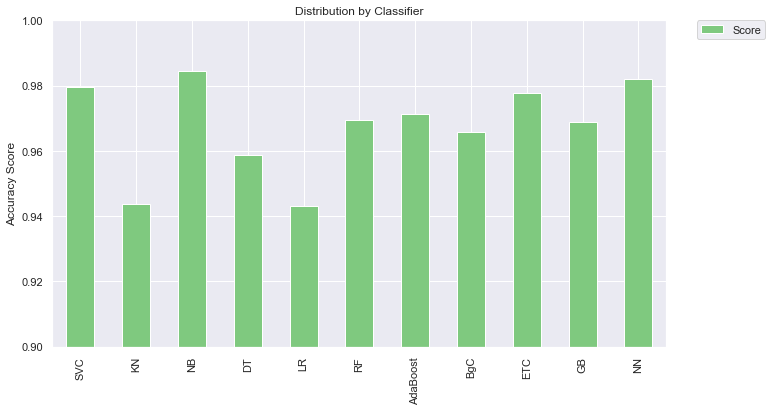

In [92]:
#%%pycodestyle
rlt.plot(kind='bar', ylim=(0.9, 1.0), figsize=(11, 6),
         align='center', colormap="Accent")
sns.set(style='darkgrid')
plt.xticks(np.arange(11), rlt.index)
plt.ylabel('Accuracy Score')
plt.title('Distribution by Classifier')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

The best accuracy score is around 0.984 in the Naive Bayes classifier for multinomial models (NB). Suppor vector classifier (SVC) also shows high accuracy score. On the other hand, k-neighbor classifier and Logistic Regression show the lowest accuracy score of all.

### Fig.10 Results of the Case Studyies 1 and 2
<a id="fig10"></a>

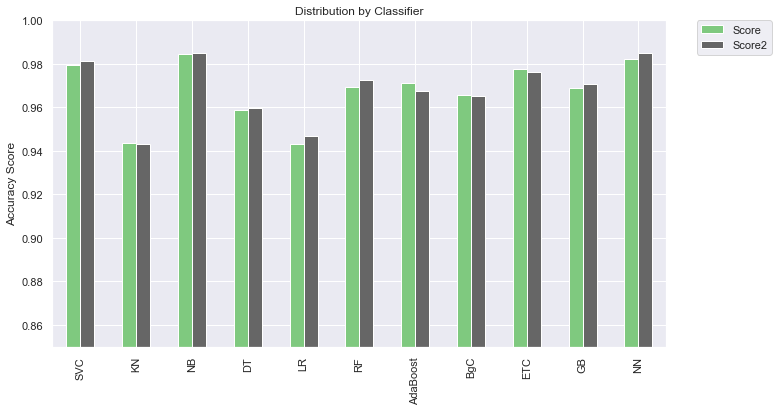

In [93]:
#%%pycodestyle
rlt2.plot(kind='bar', ylim=(0.85, 1.0), figsize=(11, 6),
          align='center', colormap="Accent")
plt.xticks(np.arange(11), rlt2.index)
plt.ylabel('Accuracy Score')
plt.title('Distribution by Classifier')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

The results are almost the same with those of case study 1. However, stemming shows a little bit improvement of accuracy score in many methods.

### Fig.11 Results of the Case Studyies 1, 2 and 3
<a id="fig11"></a>

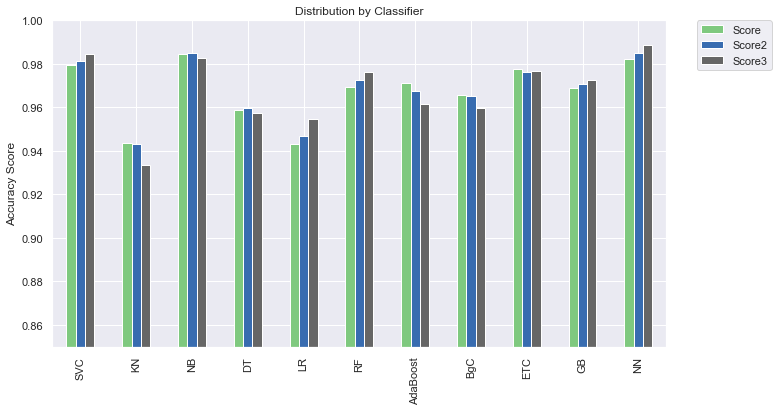

In [94]:
#%%pycodestyle
rlt3.plot(kind='bar', ylim=(0.85, 1.0), figsize=(11, 6),
          align='center', colormap="Accent")
plt.xticks(np.arange(11), rlt3.index)
plt.ylabel('Accuracy Score')
plt.title('Distribution by Classifier')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#### Conclusions
As shown the above, the accuracy score improves in Support Vector Classifier (SVC), Logistic Regression, Random Forest, Gradient Boosting, and Neural Network (NN). Each of them shows the best score of all three cases.
On the other hand, it deteriorates in k-neighbor classifier, Naive Bayes classifier (NB), Decision Tree, AdaBoost, and Bagging Classifier.
As a result, we can see SVC, NB and NN perform more than 0.98 of accuracy score. Then, NN perfomes the highest accuracy score of aournd 0.989 in the case study 3.